In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

In [4]:
X

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
       -0.11706848,  0.78960641,  0.38371736, -0.23473719,  0.27128002,
       -0.23170885, -0.23286488,  0.12098114, -0.95664012, -0.86245892,
       -0.28114376, -0.50641556,  0.15712367, -0.45401204, -0.70615185,
        1.73282438,  0.88711185,  1.0337641 ,  0.28762591,  0.72780864,
        1.05546129,  0.42450321,  1.18784901,  0.69968066,  0.85415313,
        0.69914669,  1.92613909,  0.99325139,  0.47114454,  1.41127246,
        0.38957818,  1.1044318 ,  0.02016494,  0.33590698,  1.09843062,
        2.36923329,  2.08568414,  1.94217586,  1.84944815,  1.260739  ,
        1.6400779 ,  1.76968061,  2.52856111,  2.17180914,  1.11847992,
        2.16204198,  1.80745886,  1.661539  ,  2.30583814,  2.51549976,
        2.46564006,  1.58039124,  1.84539381,  2.16563172,  2.48777256,
        2.76041288,  2.90717051,  2.44683251,  2.40189669,  3.40626291,
        3.67812001,  2.96399494,  3.50176645,  3.18081801,  2.67

In [5]:

X=X.reshape(-1,1)
X

array([[ 0.24835708],
       [-0.06913215],
       [ 0.32384427],
       [ 0.76151493],
       [-0.11707669],
       [-0.11706848],
       [ 0.78960641],
       [ 0.38371736],
       [-0.23473719],
       [ 0.27128002],
       [-0.23170885],
       [-0.23286488],
       [ 0.12098114],
       [-0.95664012],
       [-0.86245892],
       [-0.28114376],
       [-0.50641556],
       [ 0.15712367],
       [-0.45401204],
       [-0.70615185],
       [ 1.73282438],
       [ 0.88711185],
       [ 1.0337641 ],
       [ 0.28762591],
       [ 0.72780864],
       [ 1.05546129],
       [ 0.42450321],
       [ 1.18784901],
       [ 0.69968066],
       [ 0.85415313],
       [ 0.69914669],
       [ 1.92613909],
       [ 0.99325139],
       [ 0.47114454],
       [ 1.41127246],
       [ 0.38957818],
       [ 1.1044318 ],
       [ 0.02016494],
       [ 0.33590698],
       [ 1.09843062],
       [ 2.36923329],
       [ 2.08568414],
       [ 1.94217586],
       [ 1.84944815],
       [ 1.260739  ],
       [ 1

array([2.00557614, 1.33944816])

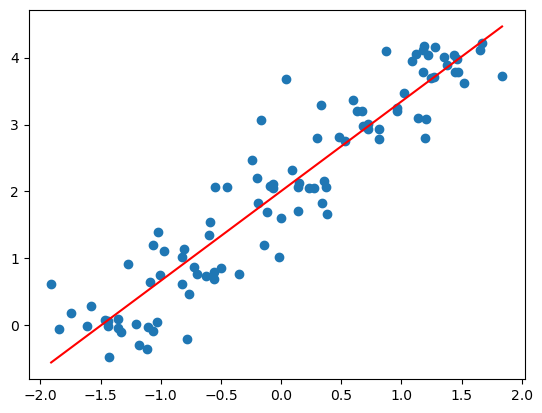

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# X_scaled=X
X_scaled_train=scaler.fit_transform(X)
X_scaled=np.insert(X_scaled_train,0,1,axis=1)
#print(X_scaled)
def gradient_descent(X,y,theta,alpha,epochs):
    m=len(y)
    hisotry=[]
    for _ in range(epochs):
        predictions=X.dot(theta)
        errors=predictions-y
        theta0_partial=(2/m)*np.sum(errors)
        theta1_partial=(2/m)*errors.dot(X[:,1])
        theta[0]-=alpha*theta0_partial
        theta[1]-=alpha*theta1_partial
        history_error=(1/m)*np.sum(errors**2)
        hisotry.append(history_error)
    return theta,hisotry
theta=np.array([0.,5.])
theta,hisotry=gradient_descent(X_scaled,y,theta,0.01,1000)

idx=np.argsort(X_scaled[:,1])

plt.scatter(X_scaled_train,y)
plt.plot(X_scaled_train[idx],X_scaled[idx].dot(theta),color='red')
theta


In [7]:
theta

array([2.00557614, 1.33944816])

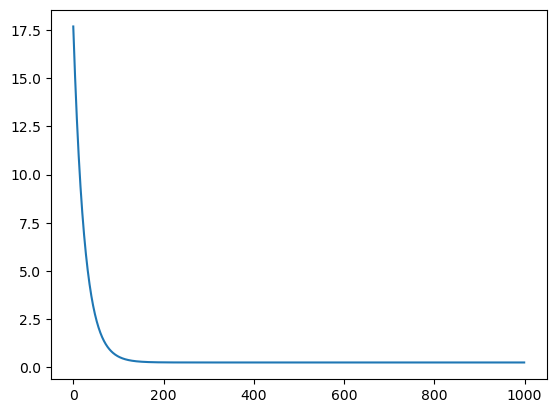

In [8]:
plt.plot(hisotry)

np.float64(2.0055761467624804)

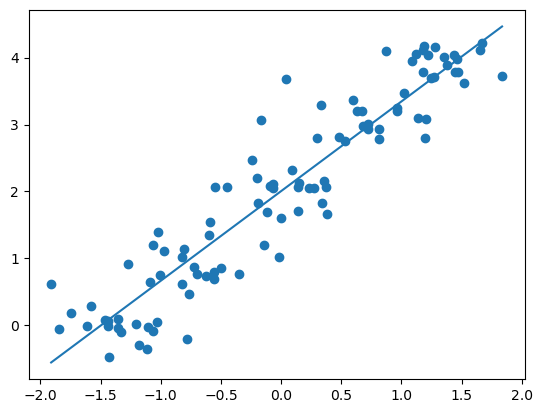

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_scaled_train,y)
plt.scatter(X_scaled_train,y)
idx=np.argsort(X_scaled_train[:,0])
plt.plot(X_scaled_train[idx],lr.predict(X_scaled_train[idx]))
lr.coef_
lr.intercept_

In [10]:
from sklearn.metrics import r2_score
r2_score(y_true=y,y_pred=lr.predict(X_scaled_train))

0.8746623488547847